In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplt
import matplotlib as plt
import re
import seaborn as sns

In [51]:
%matplotlib inline

In [3]:
summary = pd.read_csv("atussum_2013.dat")
activity = pd.read_csv("atusact_2013.dat")
respondents = pd.read_csv("atusresp_2013.dat")

#What do people with and without kids do for leisure?

In [4]:
adults = summary.TEAGE >= 18
no_kids = summary.TRCHILDNUM == 0
kids = summary.TRCHILDNUM >= 1

In [5]:
adults_with_no_kids = summary[adults & no_kids]
adults_with_kids = summary[adults & kids]

In [14]:
no_age_kids_clean = adults_with_kids[['TUFINLWGT', 't120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

In [15]:
no_age_no_kids_clean = adults_with_no_kids[['TUFINLWGT', 't120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

#Let's take a quick look at the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1140fba58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115dbc710>]], dtype=object)

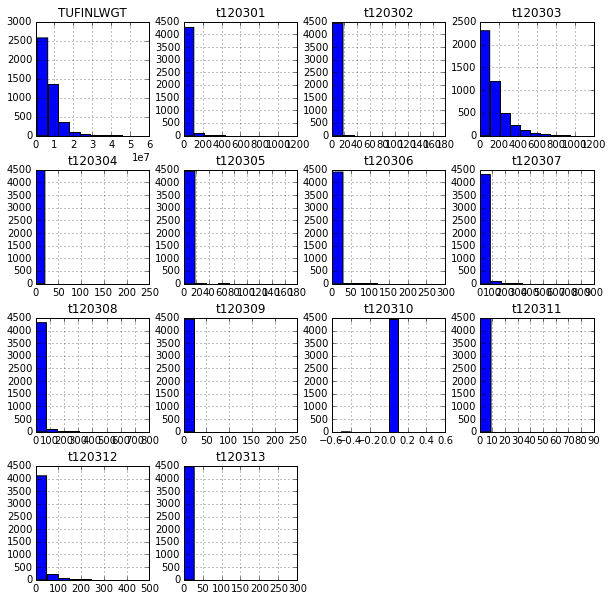

In [16]:
no_age_kids_clean.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e289e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c506cc0>]], dtype=object)

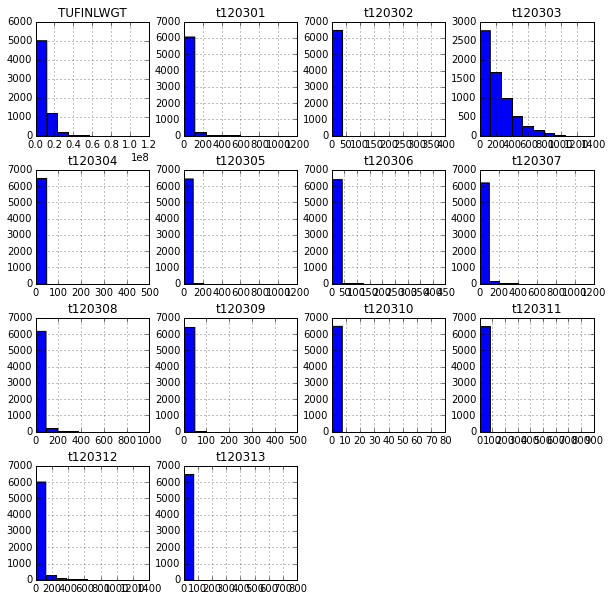

In [17]:
no_age_no_kids_clean.hist(figsize=(10,10))

#So they both seem to do alot of t120303 which is TV watching. So what is the avg. amount of time they are spending watching TV?

In [38]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [42]:
kids_avg_tv_min = average_minutes(no_age_kids_clean, '120303') / 60
no_kids_avg_tv_min = average_minutes(no_age_no_kids_clean, '120303') / 60

In [43]:
kids_avg_tv_min


2.1665801477504605

In [44]:
no_kids_avg_tv_min

3.1709004734759403

# Ok so people without kids on avg. are watching 60 minutes more of TV.

#Now I wonder what happens when we also look at the age of the Respondents?

In [48]:
age_kids_clean = adults_with_kids[['TEAGE', 't120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

In [25]:
age_no_kids_clean = adults_with_no_kids[['TEAGE', 't120301', 't120302', 't120303', 't120304',
                                     't120305', 't120306', 't120307', 't120308', 't120309', 't120310', 't120311',
                                     't120312', 't120313']]

# Let's see it in a scatter plot!

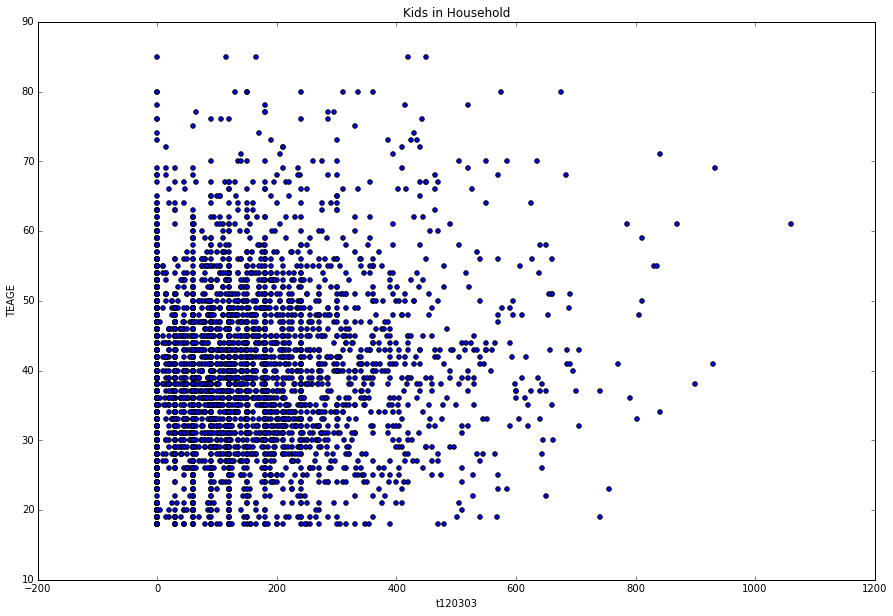

In [29]:
kid_scatter = age_kids_clean.plot(kind='scatter', x='t120303', y='TEAGE', title='Kids in Household', figsize=(15,10))

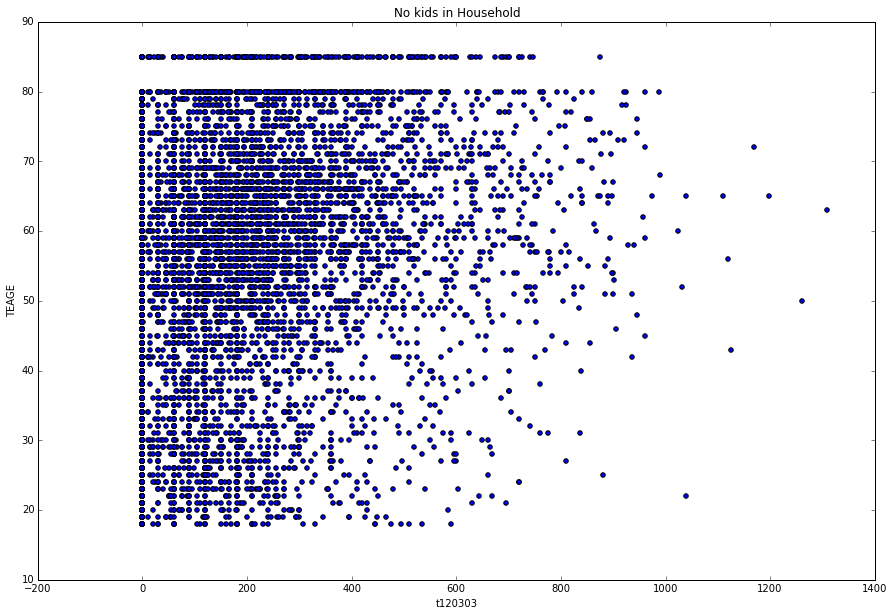

In [28]:
no_kid_scatter = age_no_kids_clean.plot(kind='scatter', x='t120303', y='TEAGE', title='No kids in Household', figsize=(15,10))

# WOAH Check that out! In a surprise twist the majority of Households that do not have children are way older! I wonder what the avg age of the 2 groups is?

In [34]:
kids_avg_age = average_minutes(adults_with_kids, 'TEAGE')
no_kids_avg_age = average_minutes(adults_with_no_kids, 'TEAGE')

In [35]:
kids_avg_age

38.429264894610839

In [36]:
no_kids_avg_age

51.577315821817002

# Wow that is quite a difference! So families with children living in the home under the age of 18, have an avg age of 38 and they usually spend about 2.1 hours a day watching television.

#Families without children living in the home, have an avg age of 51, and they usually spend about 3 hours per day watching television!

# So it appears that most people regardless of children enjoy watching TV!

In [53]:
# Linear Regression looks cool, and it looks like it is telling me that between the ages of 38 and 51,
# you will watch a lot of TV!

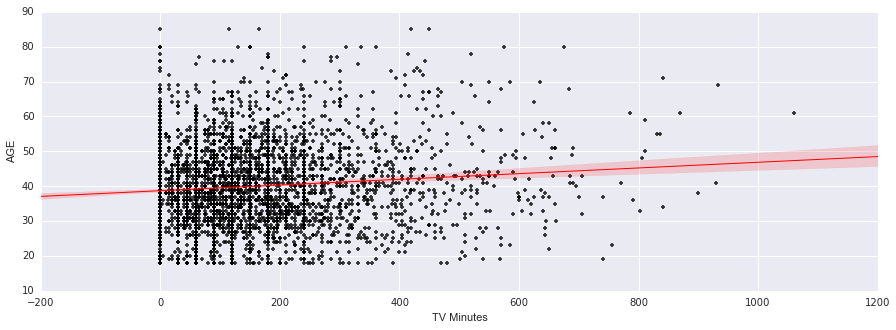

In [52]:
fig = pplt.figure(figsize=(15,5))
x, y = pd.Series(age_kids_clean['t120303'], name="TV Minutes"), pd.Series(age_kids_clean['TEAGE'], name="AGE")
ax = sns.regplot(x=x, y=y, marker='+', line_kws = { "color": "red", "linewidth":1}, color='black')